<h2>Forward and Backpropagation</h2>

<h3>🔄 Forward Propagation</h3>

Forward propagation is the process of calculating the output of a neural network given the input:

    Input → Hidden Layer:

        Multiply inputs by weights, add bias: Z1 = X · W1 + b1

        Apply activation (e.g., ReLU): A1 = ReLU(Z1)

    Hidden → Output Layer:

        Multiply by second layer weights: Z2 = A1 · W2 + b2

        Apply output activation (e.g., Sigmoid): A2 = Sigmoid(Z2)

This gives the network's prediction A2.

<h3>🔁 Backward Propagation</h3>

Backward propagation is the process of computing the gradient of the loss with respect to each weight by applying the chain rule, then updating the weights using gradient descent:

    Compute output error:
    dZ2 = A2 - y (difference between prediction and true label)

    Gradients for output layer:

        dW2 = A1ᵀ · dZ2

        db2 = sum of dZ2

    Backpropagate to hidden layer:

        dA1 = dZ2 · W2ᵀ

        dZ1 = dA1 * ReLU'(Z1)

        dW1 = Xᵀ · dZ1

        db1 = sum of dZ1

    Update parameters:

        W1 -= lr * dW1, etc.

<h3>🧠 Model Architecture For Notebook</h3>

We will implement:

    Input (2 features)→Hidden Layer (2 neurons, ReLU)→Output Layer (1 neuron, Sigmoid)

Epoch 0, Loss: 0.7604, Accuracy: 0.33
Epoch 100, Loss: 0.4902, Accuracy: 0.93
Epoch 200, Loss: 0.3100, Accuracy: 0.98
Epoch 300, Loss: 0.2228, Accuracy: 0.99
Epoch 400, Loss: 0.1763, Accuracy: 0.99
Epoch 500, Loss: 0.1472, Accuracy: 0.99
Epoch 600, Loss: 0.1269, Accuracy: 0.99
Epoch 700, Loss: 0.1116, Accuracy: 1.00
Epoch 800, Loss: 0.0998, Accuracy: 1.00
Epoch 900, Loss: 0.0902, Accuracy: 1.00


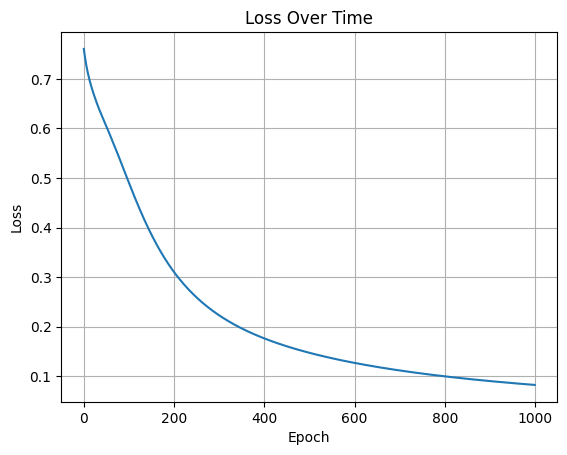

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-15 # a tiny constant (epsilon = 0.000000000000001) used to prevent math errors in the binary_cross_entropy function
                # why? when calculating the loss function (return value), it will prevent breaking when y_pred is exactly 0 or 1
                # otherwise, the log becomes -inf or nan
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate XOR-like data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)

# Model NN architecture
n_input = 2
n_hidden = 4 
n_output = 1

# He Initialisation of weights
    # He Initialization (by Kaiming He) is a method to set the initial random weights in neural networks when using ReLU activation.
    # It helps avoid problems like vanishing or exploding gradients during training. Used with ReLU, Leaky ReLU.

W1 = np.random.randn(n_input, n_hidden) * np.sqrt(2 / n_input)
b1 = np.zeros((1, n_hidden))

W2 = np.random.randn(n_hidden, n_output) * np.sqrt(2 / n_hidden)
b2 = np.zeros((1, n_output))

# Training parameters
lr = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    loss = binary_cross_entropy(y, A2)
    losses.append(loss)

    preds = (A2 > 0.5).astype(int)
    acc = np.mean(preds == y)

    # Backward pass
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / len(X)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / len(X)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}")

# Plot the loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.grid(True)
plt.show()